## Implementação de um algoritmo de Regressão Logística
### Este implementação foi realizada por Matheus Facure
#### fonte: https://shorturl.at/bmKVY

**Problema**: Queremos algum modelo capaz de prever a probabilidade da pessoa sofrer um acidente com base no tempo que durou a autoescola dela. Por motivos de simplicidade, vamos dizer que a probabilidade da pessoa bater o carro só dependa to tempo que ela gastou na autoescola; nós temos acesso à esse tempo, mas não sabemos exatamente como ele se relaciona com a probabilidade da pessoas segurada sofrer um acidente automobilístico.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Dataset:

Valor de Horas na autoescola     --->  [15 16 18 20 22 24 26 28 30 32 34 36 38 40 42]
Acidente (1) ou Sem Acidente (0) --->  [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


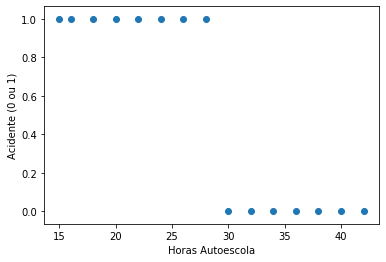

In [6]:
"""Dados de Treinamento """
x = np.linspace(15,42,15).astype(int)
y_logit = x*-0.5 + 15 + np.random.normal(0,1.5, x.shape)
y = np.round(np.exp(y_logit) / (np.exp(y_logit) + 1), 0)
print('Valor de Horas na autoescola     ---> ',x)
print('Acidente (1) ou Sem Acidente (0) ---> ', y)

""" Grafico: Numero de Horas Autoescola x Acidente ocorrido ou não """
plt.scatter(x, y)
plt.xlabel("Horas Autoescola")
plt.ylabel("Acidente (0 ou 1)")
plt.show()


Uma forma ingênua de resolver esse problema seria utilizar regressão linear. Para tomar uma decisão, poderíamos então um limiar:valores da regressão acima de 0.5 seriam 1 e abaixo seriam 0. A linha que melhor se ajusta aos dados seria então mais ou menos assim:

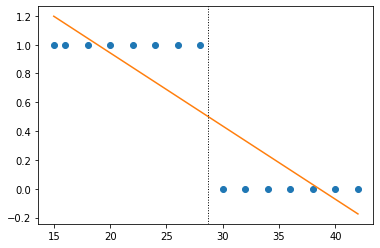

In [7]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()

Nesse caso, utilizar regressão linear e estabelecer um limiar funcionaria muito bem! Se colocássemos o nosso limiar em 0.5.

Suponha agora uma pessoa com muitas horas de autoescola. Digamos, umas 100 horas. Essa pessoa não sofreu nenhum acidente e de certa forma ter ela nos dados não traz muita informação nova.

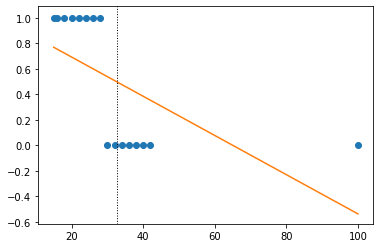

In [8]:
x_ = np.array([[100]])
y_ =  x_*-0.5 + 15 + np.random.normal(0,1.5, 1)
y_ = np.round(np.exp(y_) / (np.exp(y_) + 1), 0)

x = np.append(x, x_)
y = np.append(y, y_)

regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
line = regr.predict(x.reshape(-1,1))

plt.scatter(x, y)
plt.plot(x, line, c='C1')
plt.axvline(x=(0.5 - regr.intercept_)/regr.coef_, c='k', ls='dotted', lw=1)
plt.show()

Para resolver isso, em vez de utilizar regressão linear, vamos utilizar a regressão logística sempre que nos depararmos com problemas de classificação. Regressão logística nos fornecerá uma previsão sempre entre 0 e 1, de forma que possamos interpretar seus resultados como uma probabilidade válida. Além disso, regressão logística não será influenciada por outliers que não fornecem muita informação nova, pois a atenção do algoritmo será concentrada na região de fronteira.

Em primeiro lugar, precisamos utilizar uma função achatamento após a transformação linear, de forma que o valor previsto pelo modelo possa ser interpretado como uma probabilidade (lembre que estamos tentando modelar uma variável binária, então queremos saber a probabilidade dela ser 0 ou 1). A função de achatamento que vamos utilizar é a função logística, ou sigmoide:

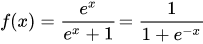

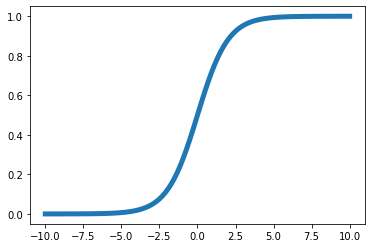

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
plt.plot(np.linspace(-10,10,100), sigmoid(np.linspace(-10,10,100)), lw=5)
plt.show()

O que a função sigmoide faz é simplesmente converter o score produzido pela transformação linear $\pmb{X}\pmb{\hat{w}}$ em uma probabilidade, de forma que quanto maior o score, maior a probabilidade prevista e vice versa.

A segunda modificação a ser feita no algoritmo de regressão linear é alterar a função custo. Agora, em vez de tentarmos minimizar a distância entre o valor previsto e o observado, nós vamos minimizar a entropia cruzada:

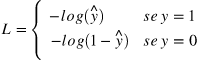

Nós podemos resumir a função custo de entropia cruzada da seguinte forma:

E o gradiente da função de custo: 

### Implmentação

In [10]:

import numpy as np
from matplotlib import pyplot as plt, style
from IPython import display

class logistic_regr(object):

    def __init__(self, learning_rate=0.0001, training_iters=100):
        self.learning_rate = learning_rate # taxa de aprendizado
        self.training_iters = training_iters # iterações de treino
        
    
    def _logistic(self, X):
        '''Função logística'''
        return  1 / (1 + np.exp(-np.dot(X, self.w_hat)))
    
    
    def fit(self, X_train, y_train):
        
        # formata os dados
        X = X_train.reshape(-1,1) if len(X_train.shape) < 2 else X_train
        X = np.insert(X, 0, 1, 1)
               
        # inicia os parâmetros com pequenos valores aleatórios (nosso chute razoável)
        self.w_hat = np.random.normal(0,1, size = X[0].shape)
        
        # loop de treinamento
        for _ in range(self.training_iters):
            
            gradient = np.zeros(self.w_hat.shape) # inicia o gradiente
            
            # atualiza o gradiente com informação de todos os pontos
            for var in range(len(gradient)):
                gradient[var] += np.dot((self._logistic(X) - y_train), X[:,var])
            
            gradient *= self.learning_rate # multiplica o gradiente pela taxa de aprendizado

            # atualiza os parâmetros
            self.w_hat -= gradient
            
            
    def predict(self, X_test):
        
        # formata os dados
        if len(X_test.shape) < 2:
            X = X_test.reshape(-1,1)
        X = np.insert(X, 0, 1, 1)
        
        # aplica função logística
        logit = self._logistic(X) 
        
        # aplica limiar
        return np.greater_equal(logit, 0.5).astype(int)
       

In [11]:
"""Treinando o Modelo para Regressao Logistica """
regr = logistic_regr(learning_rate=0.001, training_iters=90000)
regr.fit(x, y)


In [12]:

"""Testando a acurácia do modelo"""
x_teste = np.array([1,2,3,4,5,6,107,108,109,110,111,112,113,114,115,120])
y_hat = regr.predict(x_teste)
#print('Predicao %.1f horas --> %.1f' % (x_teste[0], y_hat))
print('Acurácia: ', np.mean(np.equal(y_hat, y)))
print('Os pesos do modelos são: %.3f, %.3f' % (regr.w_hat[0], regr.w_hat[1]))

Acurácia:  0.875
Os pesos do modelos são: 18.397, -0.638


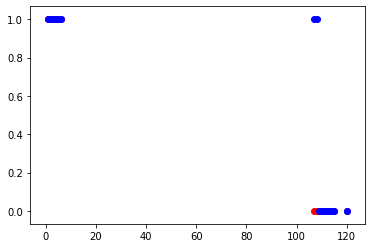

In [13]:
plt.scatter(x_teste, y_hat, c="red")
plt.scatter(x_teste, y, c="blue")